# Information on Missense vs Non-missense mutations

In [3]:
import pandas as pd
import numpy as np

In [4]:
from pathlib import Path
from analysis.database import get_config

config = get_config()
data_all = pd.read_excel(
    Path.cwd().parent / "data" / f"individual_all_data-{config.version}.xlsx")
data_all.head()

,Unnamed: 0,individual_id,sex,publication_id,title,first_author,reference,doi,year,publication_database,...,treatment_taken::Implantable cardioverter-defibrillator,treatment_taken::Left cardiac sympathetic denervation,treatment_taken::Verapamil,effective::Beta blocker,effective::Catheter ablation,effective::Enalapril,effective::Flecainide,effective::Implantable cardioverter-defibrillator,effective::Left cardiac sympathetic denervation,effective::Verapamil
0,0,1,NaN,1,Familial Evaluation in Catecholaminergic Polym...,Van Der Werf C,NaN,10.1161/CIRCEP.112.970517,2012,PubMed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,female,2,Flecainide therapy reduces exercise-induced ve...,"van der Werf, C",NaN,10.1016/j.jacc.2011.01.026,2011,PubMed,...,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN
2,2,3,male,3,Structural abnormalities on cardiac magnetic r...,"Gerber, D",NaN,10.1016/j.jacep.2020.03.006,2020,PubMed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,female,4,Genetic Background of Catecholaminergic Polymo...,"Kawamura, M",NaN,10.1253/circj.cj-12-1460,2013,PubMed,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,male,5,Gender differences in the inheritance mode of ...,"Ohno, S.",NaN,10.1371/journal.pone.0131517,2015,PubMed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
selected_columns = [
    "individual_id",
    "hgvs_string",
    "c_hgvs_string",
    "p_hgvs_string",
    "protein_change_type",
    "Catecholaminergic polymorphic ventricular tachycardia 1",
    "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
]

data = data_all[selected_columns].copy()
data = data[
    # only CPVT patients
    data["Catecholaminergic polymorphic ventricular tachycardia 1"] == 1
    ]
data.head()

,individual_id,hgvs_string,c_hgvs_string,p_hgvs_string,protein_change_type,Catecholaminergic polymorphic ventricular tachycardia 1,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1
0,1,NM_001035.3:c.13564-41A>G,NM_001035.3:c.13564-41A>G,NaN,NaN,1.0,NaN
1,2,NM_001035.3:c.14885A>G,NM_001035.3:c.14885A>G,NP_001026.2:p.(Tyr4962Cys),Substitution,1.0,NaN
2,3,NM_001035.3:c.14173T>A,NM_001035.3:c.14173T>A,NP_001026.2:p.(Tyr4725Asn),Substitution,1.0,NaN
3,4,NM_001035.3:c.14174A>G,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),Substitution,1.0,2.0
4,5,NM_001035.3:c.14174A>G,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),Substitution,1.0,10.0


In [6]:
mutation_types = pd.DataFrame(data["protein_change_type"].value_counts())
mutation_types["percentage"] = mutation_types["count"] / mutation_types[
    "count"].sum() * 100
mutation_types

,count,percentage
protein_change_type,,
Substitution,914,97.545358
Deletion,18,1.921025
Insertion,4,0.426894
Frameshift,1,0.106724


In [7]:
mutation_types["count"].sum()

937

In [8]:
data["protein_change_type"].unique()

array([nan, 'Substitution', 'Deletion', 'Frameshift', 'Insertion'],
      dtype=object)

In [9]:
non_sub_uq = data[(data["protein_change_type"] != "Substitution") & data[
    "protein_change_type"].notna()].drop_duplicates(
    subset=["hgvs_string"]
)
non_sub_uq

,individual_id,hgvs_string,c_hgvs_string,p_hgvs_string,protein_change_type,Catecholaminergic polymorphic ventricular tachycardia 1,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1
551,555,NP_001026.2:p.Asn57_Gly91del,NaN,NP_001026.2:p.Asn57_Gly91del,Deletion,1.0,16.0
577,581,NM_001035.3:c.161_272del,NM_001035.3:c.161_272del,NP_001026.2:p.(Asn54SerfsTer11),Frameshift,1.0,NaN
793,799,NP_001026.2:p.H394_M399del,NaN,NP_001026.2:p.His394_Met399del,Deletion,1.0,NaN
1304,1313,NM_001035.3:c.14834_14835insTCA,NM_001035.3:c.14832_14834dup,NP_001026.2:p.(Tyr4944_Gln4945insHis),Insertion,1.0,5.0
1306,1315,NM_001035.3:c.13967_13972dup,NM_001035.3:c.13967_13972dup,NP_001026.2:p.(Tyr4657_Gly4658insGluTyr),Insertion,1.0,NaN
1307,1316,NP_001026.2:p.(K4022_L4023insG),NaN,NP_001026.2:p.(Lys4022_Leu4023insGly),Insertion,1.0,NaN
1309,1318,NP_001026.2:p.E171del,NaN,NP_001026.2:p.Glu171del,Deletion,1.0,NaN


In [10]:
non_sub = data[(data["protein_change_type"] != "Substitution") &
               (data["protein_change_type"].notna())
               ]
non_sub.value_counts("protein_change_type")

protein_change_type
Deletion      18
Insertion      4
Frameshift     1
Name: count, dtype: int64

In [11]:
def get_stats(df: pd.DataFrame, col: str):
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    print(
        f"Median {median}, IQR: {q1}-{q3} ({np.abs(q1 - q3)}) (N={sum(df[col].notna())})")


# cpvt_non_missense["age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].median()
get_stats(non_sub,
          "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1")

Median 10.5, IQR: 6.0-15.5 (9.5) (N=10)


In [12]:
get_stats(data[data["protein_change_type"] == "Substitution"],
          "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1")

Median 11.0, IQR: 7.0-14.0 (7.0) (N=394)


In [13]:
from scipy.stats import mannwhitneyu


def compare_groups(df: pd.DataFrame, colmask: np.ndarray, target_column: str):
    group1 = df[colmask][target_column]
    group2 = df[~colmask][target_column]

    print(f"Group 1: {len(group1)}")
    print(f"Group 2: {len(group2)}")

    stat, p = mannwhitneyu(group1, group2)

    print(f"U={stat}, p={p}")

    get_stats(df[colmask], target_column)
    get_stats(df[~colmask], target_column)

    return stat, p


data_with_age = data[(data[
                          "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].notna()) &
                     (data[
                          "Catecholaminergic polymorphic ventricular tachycardia 1"] == 1) &
                     (data["protein_change_type"].notna())].copy()

data_with_age.head()

,individual_id,hgvs_string,c_hgvs_string,p_hgvs_string,protein_change_type,Catecholaminergic polymorphic ventricular tachycardia 1,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1
3,4,NM_001035.3:c.14174A>G,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),Substitution,1.0,2.0
4,5,NM_001035.3:c.14174A>G,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),Substitution,1.0,10.0
5,6,NM_001035.3:c.14174A>G,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),Substitution,1.0,2.0
6,7,NM_001035.3:c.14174A>G,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),Substitution,1.0,10.0
18,19,NM_001035.3:c.7175A>G,NM_001035.3:c.7175A>G,NP_001026.2:p.(Tyr2392Cys),Substitution,1.0,12.0


In [14]:
mwu_u, mwu_p = compare_groups(data_with_age,
                              data_with_age[
                                  "protein_change_type"] == "Substitution",
                              "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1")

Group 1: 394
Group 2: 10
U=2100.5, p=0.7209891257283234
Median 11.0, IQR: 7.0-14.0 (7.0) (N=394)
Median 10.5, IQR: 6.0-15.5 (9.5) (N=10)


In [15]:
data_with_age["protein_change_type"].value_counts()

protein_change_type
Substitution    394
Deletion          8
Insertion         2
Name: count, dtype: int64

In [16]:
data_with_age["missense"] = data_with_age["protein_change_type"].apply(
    lambda x: "Missense" if x == "Substitution" else "null" if pd.isna(
        x) else "Non-missense"
)
data_with_age.head()

,individual_id,hgvs_string,c_hgvs_string,p_hgvs_string,protein_change_type,Catecholaminergic polymorphic ventricular tachycardia 1,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1,missense
3,4,NM_001035.3:c.14174A>G,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),Substitution,1.0,2.0,Missense
4,5,NM_001035.3:c.14174A>G,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),Substitution,1.0,10.0,Missense
5,6,NM_001035.3:c.14174A>G,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),Substitution,1.0,2.0,Missense
6,7,NM_001035.3:c.14174A>G,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),Substitution,1.0,10.0,Missense
18,19,NM_001035.3:c.7175A>G,NM_001035.3:c.7175A>G,NP_001026.2:p.(Tyr2392Cys),Substitution,1.0,12.0,Missense


Directory exists: ../figures/0_3_3/analysis_14


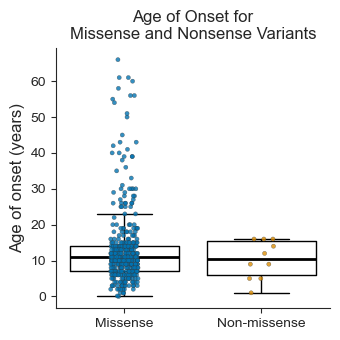

In [17]:
import os
from analysis.database import set_figure_size
# boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks")
# set font size to 12
plt.figure(
    figsize=get_config().s_figure_2.fig_size
)

#sns.violinplot(x="missense", y="age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1", data=data_with_age, hue="missense", inner="quart", cut=0)
sns.boxplot(x="missense",
            y="age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
            data=data_with_age,
            linewidth=1,
            fill=False,
            # width=0.8,
            # palette=palette_exon,
            # hue="exon_start",
            # order=order_exons,
            medianprops=get_config().figure_palette.box_median_props,
            # linecolor="black",
            color="black",
            #fill=False,
            showfliers=False,
            legend=False,
            )
sns.stripplot(
    data=data_with_age,
    x="missense",
    y="age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
    # color="black",
    palette=get_config().figure_palette.cat_palette,
    hue="missense",
    legend=False,
    linewidth=0.25,
    alpha=0.8,
    size=3,
)
# plt.ylabel("Age of onset")
# plt.xlabel("Is missense")
# # plt.title("Age of onset for missense and non-missense mutations")

sns.despine()

figures_dir = Path(
    os.path.join("..", "figures", config.version_for_dir, "analysis_14"))

if not figures_dir.exists():
    figures_dir.mkdir()
    print("Created directory:", figures_dir)
else:
    print("Directory exists:", figures_dir)

plt.tight_layout()
set_figure_size(get_config().s_figure_2)

plt.savefig(
    figures_dir / "age_of_onset_vs_missense.png",
    dpi=300
)

plt.show()

In [18]:
# get the range of age of onset for missense and non-missense
data_with_age.groupby(data_with_age["missense"])[
    "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].agg(
    ["min", "max"])

,min,max
missense,,
Missense,0.0,66.0
Non-missense,1.0,16.0


In [19]:
# perform Kolmogorov-Smirnov test
from scipy.stats import ks_2samp

kd_res = ks_2samp(
    data_with_age[data_with_age["missense"] == "Missense"][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"],
    data_with_age[~(data_with_age["missense"] == "Missense")][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"]
)
kd_res

KstestResult(statistic=0.18781725888324874, pvalue=0.8204487252248658, statistic_location=16.0, statistic_sign=-1)

In [20]:
kd_res

KstestResult(statistic=0.18781725888324874, pvalue=0.8204487252248658, statistic_location=16.0, statistic_sign=-1)

In [25]:
from analysis.write_report import PdfSection

report = [
    PdfSection(
        section="Missense vs Non-missense mutations",
        stuff=[
            f"All patients with CPVT mutation types:",
            mutation_types,
            # cpvt_non_missense["age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].median()
            f"The non-missense patients with age of onset: {
            get_stats(non_sub,
                      "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1")
            }",
            f"The missense patients with age of onset: {
            get_stats(data[data["protein_change_type"] == "Substitution"],
                      "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1")
            }",
            f"Comparison of age of onset between missense and non-missense mutations:",
            f"U={mwu_u}, p={mwu_p}",
            # get the range of age of onset for missense and non-missense
            data_with_age.groupby(data_with_age["missense"])[
                "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].agg(
                ["min", "max"])
        ]
    )
]

Median 10.5, IQR: 6.0-15.5 (9.5) (N=10)
Median 11.0, IQR: 7.0-14.0 (7.0) (N=394)


In [26]:
from analysis.write_report import write_sections_to_pdf
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas

# report
pdf_name = figures_dir / "missense.pdf"

# Create PDF and write content
c = canvas.Canvas(str(pdf_name), pagesize=A4)
write_sections_to_pdf(c, report)
c.save()

print(f"PDF saved to {pdf_name}")

PDF saved to ../figures/0_3_3/analysis_14/missense.pdf
